# considering closing price and moving average

In [2]:
from __future__ import (absolute_import, division, print_function,
 
                        unicode_literals)
import pandas as pd
import numpy as np
#simple moving average
def sma(prices, period):
    num_prices = len(prices)

    if num_prices < period:
        # show error message
        raise SystemExit('Error: num_prices < period')

    sma_range = num_prices - period + 1

    smas = np.zeros(sma_range)

    # only required for the commented code below
    #k = period

    for idx in range(sma_range):
        # this is the code, but using np.mean below is faster and simpler
        #for period_num in range(period):
        #    smas[idx] += prices[idx + period_num]
        #smas[idx] /= k

        smas[idx] = np.mean(prices[idx:idx + period])

    return smas


if __name__=="__main__": 
    mydata=pd.read_csv("SBIN.csv")
    prices=np.array(mydata['Close'])

    sma=sma(prices,20)
    print (sma)


[ 290.015   291.105   291.9275 ...,  256.1725  257.7825  259.34  ]


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.dates as mdates
mydata=pd.read_csv("SBIN.csv")
close=mydata['Close'].values

close=close[19:]
print (close)

[ 296.15  298.6   296.4  ...,  273.3   277.55  277.05]


In [10]:
len(close)

4692

In [5]:
len(sma)

4692

In [11]:
#importing module for machine learning
from sklearn import linear_model
import pandas as pd
import matplotlib.dates as mdates

In [13]:
#splitting the data into two sets training and testing dataset
stock_x_train=close[:-20]
stock_x_test=close[-20:]

In [14]:
#splitting the target into training and testing dataset
stock_y_train=sma[:-20]
stock_y_test=sma[-20:]

In [15]:
#creating the linear regression object
regr=linear_model.LinearRegression()
#reshaping to remove depreciation error
stock_x_train=stock_x_train.reshape(-1,1)
stock_y_train=stock_y_train.reshape(-1,1)

In [16]:
regr.fit(stock_x_train,stock_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print("Coefficient is ",regr.coef_)

Coefficient is  [[ 0.98563086]]


In [18]:
stock_x_test=stock_x_test.reshape(-1,1)
stock_y_test=stock_y_test.reshape(-1,1)

In [19]:
#mean square error, it should be closer to zero for a good condition
print("Mean squared error: %.2f" % np.mean((regr.predict(stock_x_test) - stock_y_test) ** 2))

Mean squared error: 408.53


In [20]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(stock_x_test, stock_y_test))

Variance score: -44.44


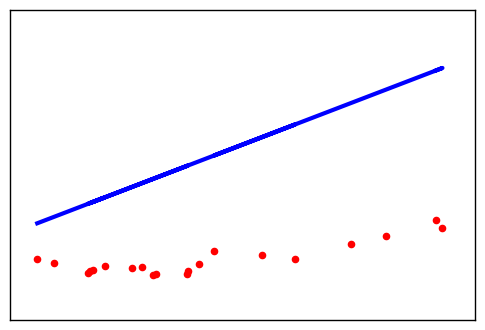

In [21]:
#plotting the output
plt.scatter(stock_x_test, stock_y_test, color='red')
plt.plot(stock_x_test,regr.predict(stock_x_test),color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
